# London tube network - random graph

Use the Tube network from the previous practicals and create an Erdős-Rényi and Barabási–Albert graph with the same number of elements. Compare the 3 graphs based on their degree distribution and reflect on the outputs.

## 1. import libraries

In [204]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statistics import mean

## 2. Load London tube data

In [205]:
G = nx.read_graphml('london_tubenetwork.graphml')
G.name = "London Tube Network"
type(G)

networkx.classes.graph.Graph

Get the number of nodes and edges in the London tube network

In [206]:
# Get the number of nodes and edges in the Tube network
num_nodes_tube = G.number_of_nodes()
num_edges_tube = G.number_of_edges()

print("Number of nodes in the tube network:", G.number_of_nodes())
print("Number of edges in the tube network:", G.number_of_edges())

Number of nodes in the tube network: 438
Number of edges in the tube network: 486


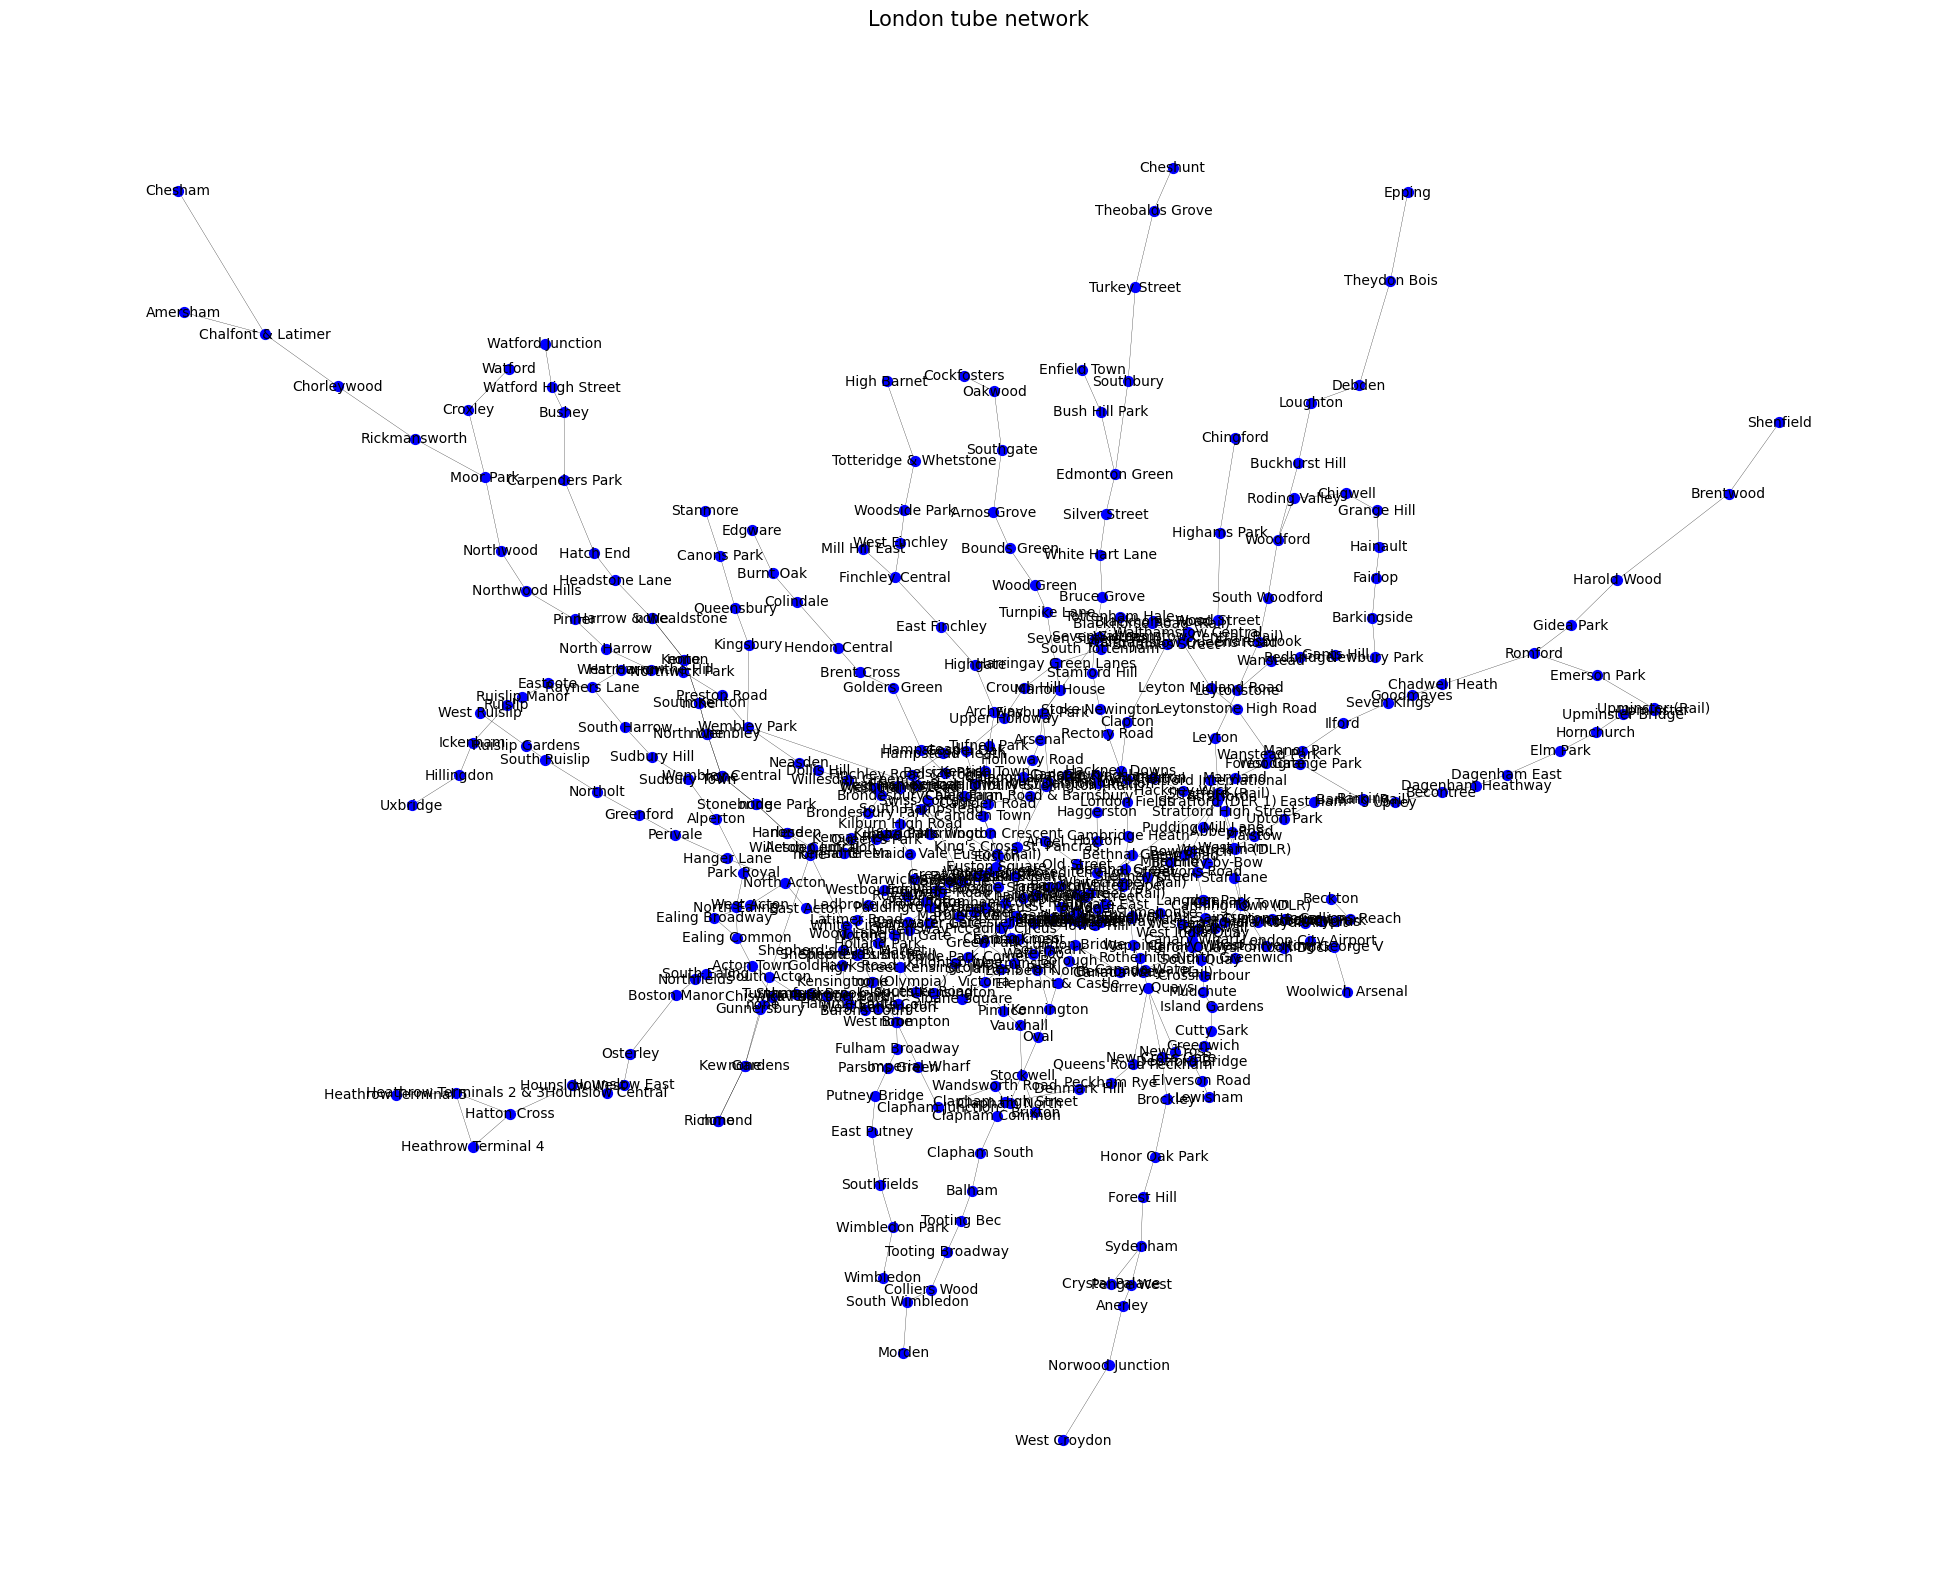

In [207]:
# since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])
    
# add the stations name to the edge attributes from the nodes attributes:

nod_name1={(e1,e2):(G.nodes[e1]['station_name']) for e1, e2 in G.edges()}
nod_name2={(e1,e2):(G.nodes[e2]['station_name']) for e1, e2 in G.edges()}

nx.set_edge_attributes(G,nod_name1,'station_1_')
nx.set_edge_attributes(G,nod_name2,'station_2_')

# plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

node_labels = nx.get_node_attributes(G, 'station_name')

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G,pos, node_labels, font_size=10, font_color='black')

plt.title("London tube network",fontsize=15)
plt.axis("off")
plt.show()

For any $k$, $p(k)$ is the fraction of nodes having degree $k$.

$p(k)$  is then the probability that a randomly chosen node in the network has degree $k$. 

In [208]:
df_G = pd.DataFrame({'k': degree_values_G, 'p(k)': probability_G})
df_G

,k,p(k)
0,1,0.089041
1,2,0.732877
2,3,0.095890
3,4,0.054795
4,5,0.011416
5,6,0.011416
6,7,0.004566


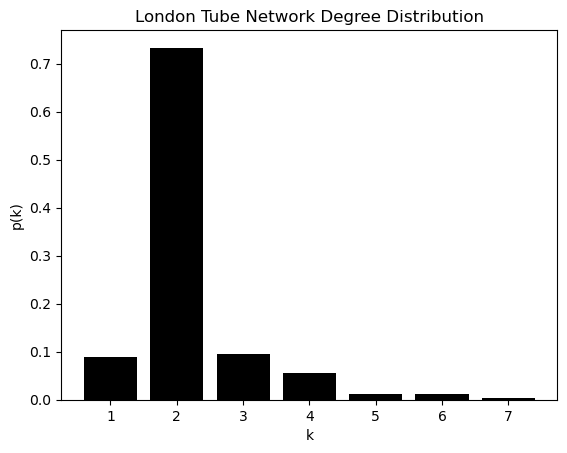

In [209]:
degree_G = nx.degree(G)
nx.set_node_attributes(G, dict(degree_G), 'deg')
G_deg = [i[1]['deg'] for i in G.nodes(data=True)]
degree_values_G = sorted(set(G_deg))  # k
probability_G = [list(G_deg).count(i) / float(nx.number_of_nodes(G)) for i in degree_values_G]  # p(k)

plt.bar(degree_values_G, probability_G, color="k")
plt.xlabel('k')
plt.ylabel('p(k)')
plt.title('London Tube Network Degree Distribution')
plt.show()

## 3. Erdős-Rényi graph

create a $G(n, p)$ model where $n$ is the number of nodes and $p$ is the probability for a link between any two nodes

maximum possible number of edges =  n(n-1)/2 

438(437)/2 = 95,703

p = (number of edges) / (maximum possible number of edges)

p = 486 / 95,703

In [210]:
# Probability of an edge in the ER model
p = num_edges_tube / (num_nodes_tube * (num_nodes_tube - 1) / 2)
print("Probability of an edge in the ER model:", p)

# round the probability to 4 decimal places
p = round(p, 4)
p

Probability of an edge in the ER model: 0.005078210714397667


0.0051

In [211]:
ER= nx.erdos_renyi_graph(num_nodes_tube,p) 
ER.name="Erdős-Rényi graph"

In [212]:
print("Number of nodes in the ER model:", ER.number_of_nodes())
print("Number of edges in the ER model:", ER.number_of_edges())

Number of nodes in the ER model: 438
Number of edges in the ER model: 479


## 4. Barabási–Albert graph

 the number of edges to attach from a new node to existing nodes (typically denoted as m), and optionally, the number of initial nodes (m0) that the newly added nodes will be connected to.

 n  – The number of nodes 
 
 m  – Number of edges to attach from a new node to existing nodes

number of edges = m0(m0-1)/2 + m(n-m0)

486 = 2(1)/2 + m(438-2)

486 = 1 + 436m

m ≈ 1.11

386

In [213]:
Initial_tube = nx.barabasi_albert_graph(52,2)
print("Number of nodes in the initial tube network:", Initial_tube.number_of_nodes())
print("Number of edges in the initial tube network:", Initial_tube.number_of_edges())

Number of nodes in the initial tube network: 52
Number of edges in the initial tube network: 100


In [214]:
BA = nx.barabasi_albert_graph(num_nodes_tube, 1,initial_graph=Initial_tube)
print("Number of nodes in the BA network:", BA.number_of_nodes())
print("Number of edges in the BA network:", BA.number_of_edges())

Number of nodes in the BA network: 438
Number of edges in the BA network: 486


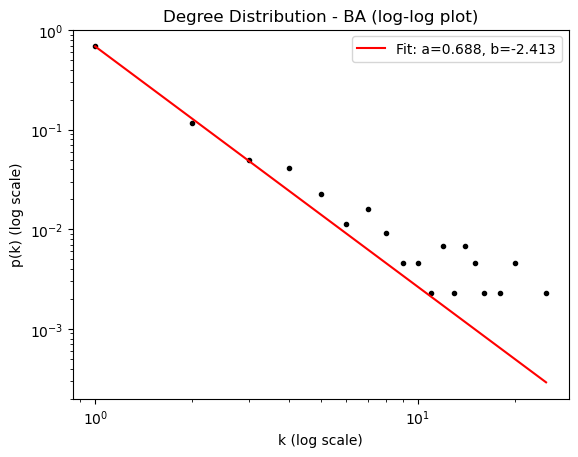

In [215]:
degree_values = np.array(degree_valuesBA)
probability = np.array(probabilityBA)

non_zero_indices = np.where(degree_values != 0)
degree_values = degree_values[non_zero_indices]
probability = probability[non_zero_indices]

plt.loglog(degree_values, probability, 'ko', markersize=3)
plt.xlabel('k (log scale)')
plt.ylabel('p(k) (log scale)')
plt.title('Degree Distribution - BA (log-log plot)')

from scipy.optimize import curve_fit

def power_law(x, a, b):
    return a * x**b

initial_guess = [1, -2]
fit_params, cov_matrix = curve_fit(power_law, degree_values, probability, p0=initial_guess)
a, b = fit_params

plt.loglog(degree_values, power_law(degree_values, a, b), 'r-', label='Fit: a=%5.3f, b=%5.3f' % (a, b))
plt.legend()
plt.show()

## 5. Compare random graphs

C:\Users\dune\AppData\Local\Temp\ipykernel_14648\1045477727.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)  #this is just for plotting both graph together


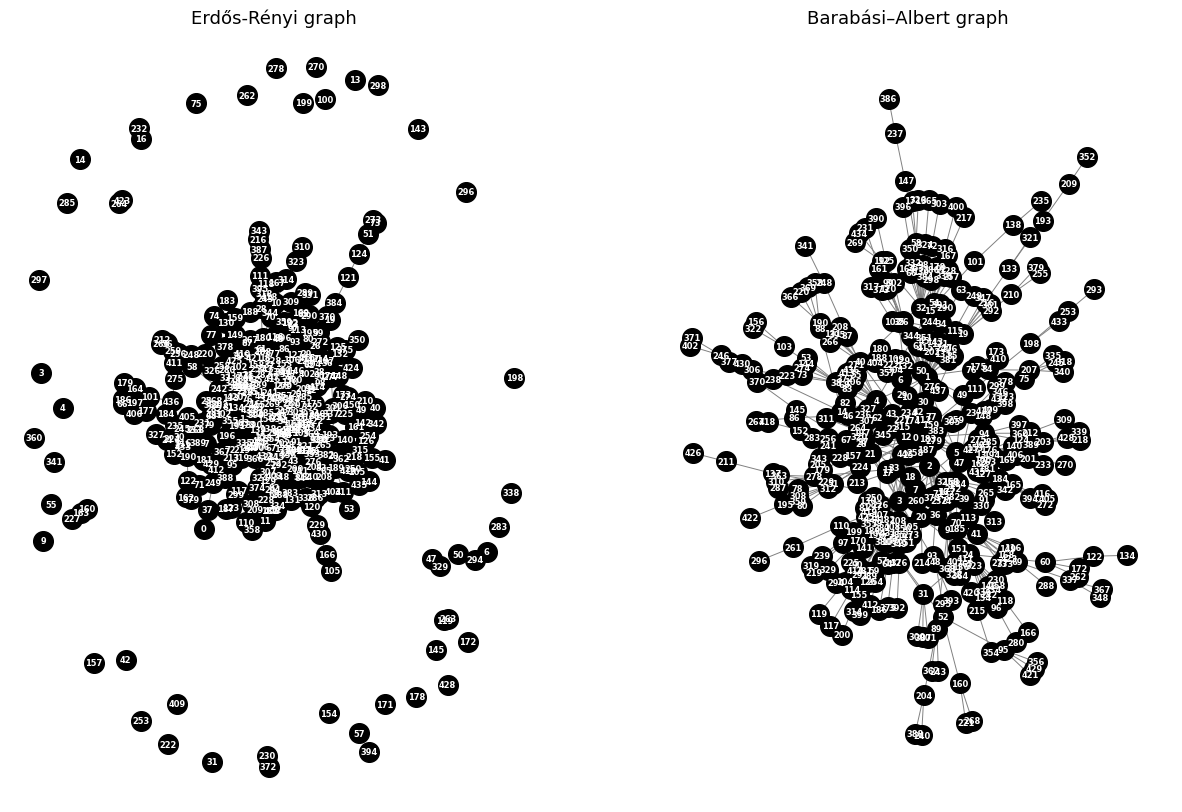

In [216]:
fig, ax = plt.subplots(figsize=(15,10))

plt.subplot(1, 2, 1)  #this is just for plotting both graph together 
#this represents: (number of rows=1, number of columns=2, position of current plot= 1)

nx.draw(ER, 
        with_labels=True,
        node_size=200, 
        font_size=6, 
        font_color="w",
        font_weight='bold',
        node_color="k",
        edge_color='grey',
        width=0.7)
plt.title("Erdős-Rényi graph",fontsize=13)



plt.subplot(1, 2, 2)
nx.draw(BA, 
        with_labels=True,
        node_size=200, 
        font_size=6, 
        font_color="w",
        font_weight='bold',
        node_color="k",
        edge_color='grey',
        width=0.7)
plt.title("Barabási–Albert graph",fontsize=13)

plt.show()

In [217]:
print(ER)
print(BA)

Graph named 'Erdős-Rényi graph' with 438 nodes and 479 edges
Graph with 438 nodes and 486 edges


plot both graphs using the same range of colour values. 

In [218]:
## To compute the degree of every node in both graphs:

# Degree of any node at the Erdős-Rényi graph:
degree_ER=nx.degree(ER)

nx.set_node_attributes(ER,dict(degree_ER),'deg')
ER_deg=[(i[1]['deg']) for i in ER.nodes(data=True)] # this only keeps the degree values which we will use for the color of nodes

# Degree of any node at the Barabási–Albert graph:
degree_BA=nx.degree(BA)

nx.set_node_attributes(BA,dict(degree_BA),'deg')
BA_deg=[(i[1]['deg']) for i in BA.nodes(data=True)]

C:\Users\dune\AppData\Local\Temp\ipykernel_14648\1468475960.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1) # to plot the graphs side by side


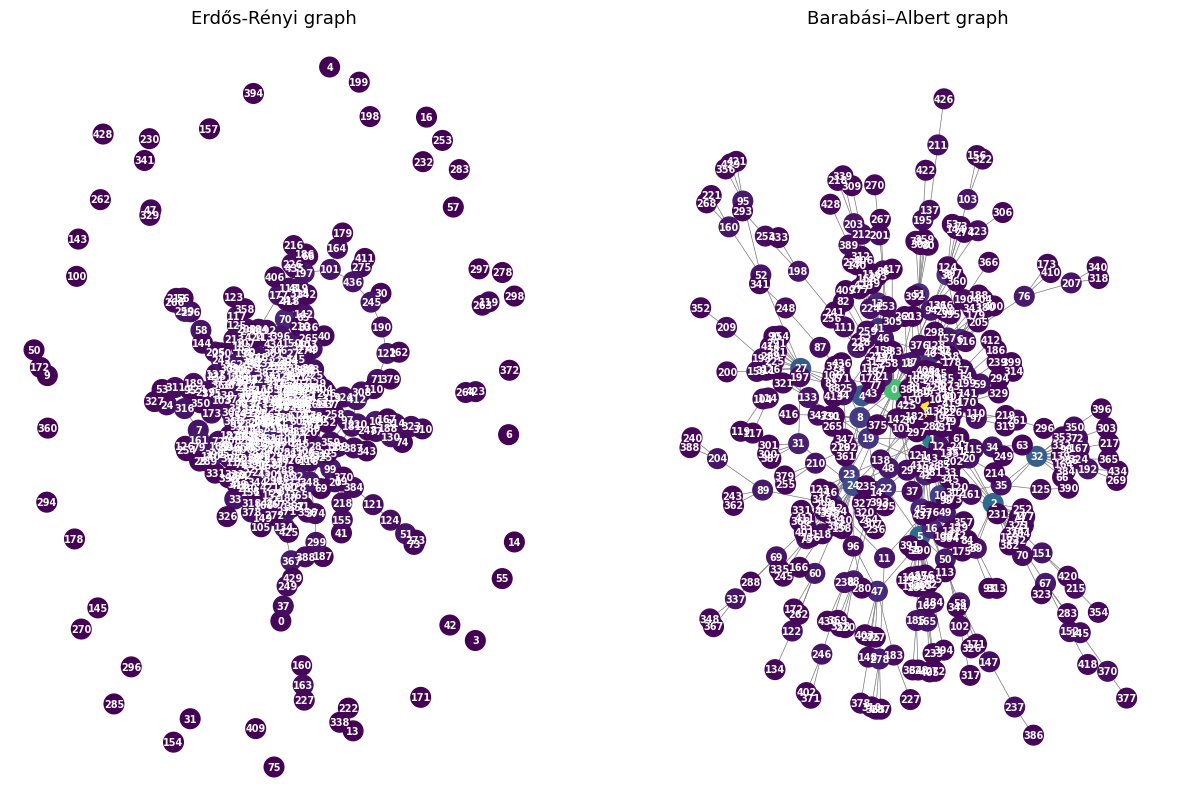

In [219]:
## To plot both graphs using the degree values for the colour of nodes:

fig, ax = plt.subplots(figsize=(15,10))


# Plot the Erdős-Rényi graph:

plt.subplot(1, 2, 1) # to plot the graphs side by side

pos_ER=nx.spring_layout(ER) # to set the possition of nodes 

nx.draw_networkx_edges(ER, 
                       pos_ER,edge_color='grey',
                       width=0.1)
nx.draw(ER, 
        pos=pos_ER,
        with_labels=True,
        node_size=200, 
        font_size=7, 
        font_color="w",
        font_weight='bold',
        node_color=ER_deg,
        vmin=min(ER_deg+BA_deg),
        vmax=max(ER_deg+BA_deg),
        edge_color='gray',
        width=0.5)
plt.title("Erdős-Rényi graph",fontsize=13)



# Plot the Barabási–Albert graph:

plt.subplot(1, 2, 2)

pos_BA=nx.spring_layout(BA)

nx.draw_networkx_edges(BA, 
                       pos_BA,edge_color='grey',
                       width=0.1)
nx.draw(BA, 
        pos=pos_BA,
        with_labels=True,
        node_size=200, 
        font_size=7, 
        font_color="w",
        font_weight='bold',
        node_color=BA_deg,
        vmin=min(ER_deg+BA_deg),
        vmax=max(ER_deg+BA_deg),
        edge_color='gray',
        width=0.5)
plt.title("Barabási–Albert graph",fontsize=13)

plt.show()


## Here we are plotting both graphs using the same range of colour values. 
## We did this by setting the "vmin" and "vmax", taking the maximum and minimum values when looking at both degree lists.


In the __Erdős-Rényi graph__ we can see that most of the nodes have the similar number of links, with no highly connected nodes.

In the __Barabási–Albert graph__ we can see many nodes with low degree values and few hubs with large number of links.

In [220]:
# Using the degree we already computed at each node, we are going to figure out the probability of each degree in both graphs:

# Probability of degrees in the Erdős-Rényi graph:

degree_valuesER = sorted(set(ER_deg)) # this give us the k values. It selects the unique values of the degrees in the graph
probabilityER = [round(list(ER_deg).count(i)/float(nx.number_of_nodes(ER)),4) for i in degree_valuesER]  # this give us the p(k) values

# Probability of degrees in the Barabási–Albert graph:

degree_valuesBA = sorted(set(BA_deg)) # this give us the k values. It selects the unique values of the degrees in the graph
probabilityBA = [round(list(BA_deg).count(i)/float(nx.number_of_nodes(BA)),4) for i in degree_valuesBA]# this give us the p(k) values


In [221]:

df_ER = pd.DataFrame({'k':degree_valuesER,'p(k)':probabilityER})
df_ER 


,k,p(k)
0,0,0.0982
1,1,0.2260
2,2,0.3059
3,3,0.2009
4,4,0.1187
5,5,0.0365
6,6,0.0068
7,7,0.0068


In [222]:
df_BA = pd.DataFrame({'k':degree_valuesBA,'p(k)':probabilityBA})
df_BA

,k,p(k)
0,1,0.6758
1,2,0.1461
2,3,0.0776
3,4,0.0342
4,5,0.0068
5,6,0.0046
6,7,0.0068
7,8,0.0114
8,9,0.0091
9,10,0.0023


## 6. compare degree distribution with the London tube network

Degree of a node: The degree of a node in a graph is the count of edges incident to that node. In directed graphs, it's often separated into in-degree (number of incoming edges) and out-degree (number of outgoing edges). However, in undirected graphs like the ones generated by the Barabási-Albert model, we typically consider the total number of edges incident to the node, regardless of direction.

Degree Distribution: The degree distribution of a random graph model describes the probability distribution of degrees across all nodes in the graph. For a given degree k, the degree distribution provides the probability that a randomly chosen node in the network has that degree.

Shape of the Degree Distribution: The shape of the degree distribution characterizes how the probabilities of different degrees are distributed across the nodes in the graph. In real-world networks, degree distributions can take various forms, including Poisson, Gaussian, or power-law distributions. Understanding the shape of the degree distribution helps in analyzing the structure and properties of the network, such as its robustness, connectivity, and resilience to random failures or targeted attacks.

C:\Users\dune\AppData\Local\Temp\ipykernel_14648\1201477599.py:33: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)


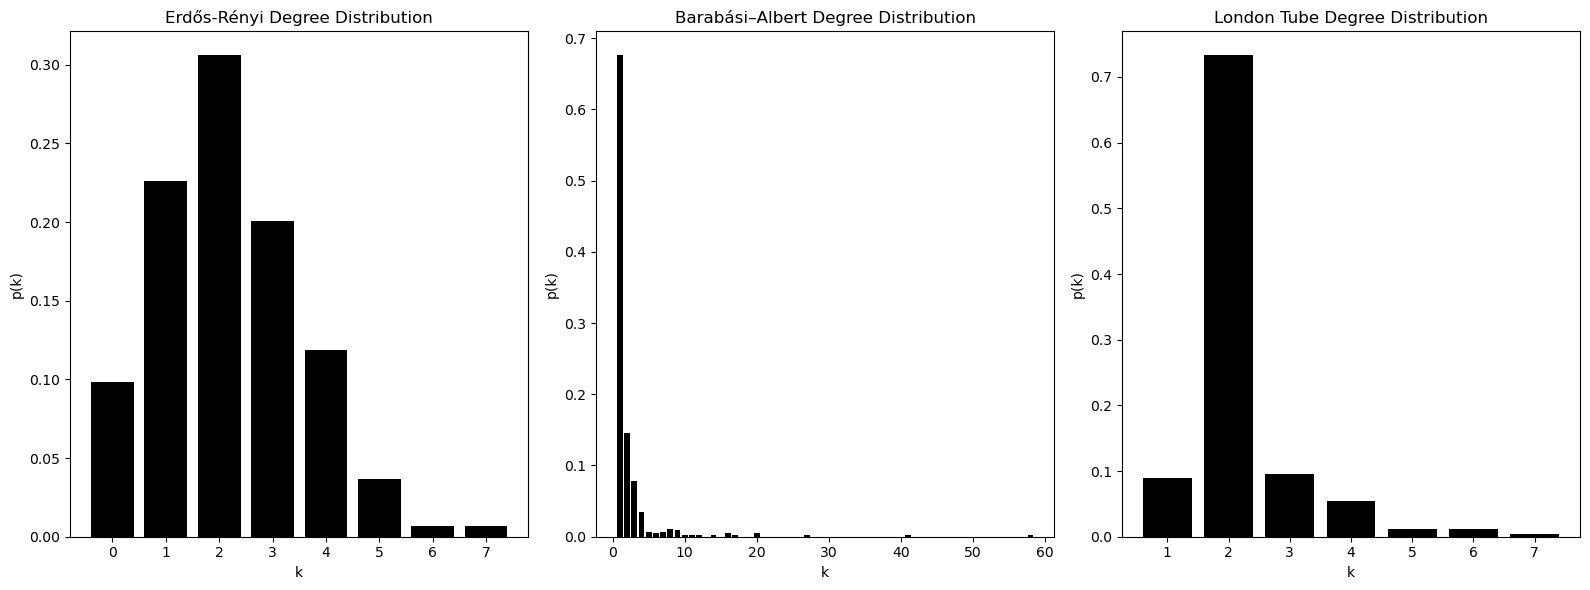

In [223]:
### computing the degree for each graph:

degree_G=nx.degree(G)
nx.set_node_attributes(G,dict(degree_G),'deg')
G_deg=[(i[1]['deg']) for i in G.nodes(data=True)]

degree_ER=nx.degree(ER)
nx.set_node_attributes(ER,dict(degree_ER),'deg')
ER_deg=[(i[1]['deg']) for i in ER.nodes(data=True)]

degree_BA=nx.degree(BA)
nx.set_node_attributes(BA,dict(degree_BA),'deg')
BA_deg=[(i[1]['deg']) for i in BA.nodes(data=True)]


### Let's find the k and p(k):

degree_valuesER = sorted(set(ER_deg)) # k
probabilityE_huge = [list(ER_deg).count(i)/float(nx.number_of_nodes(ER)) for i in degree_valuesER] #p(k)

degree_valuesBA = sorted(set(BA_deg)) # k
probabilityBA = [list(BA_deg).count(i)/float(nx.number_of_nodes(BA)) for i in degree_valuesBA] #p(k)

degree_values_G = sorted(set(G_deg))  # k
probability_G = [list(G_deg).count(i) / float(nx.number_of_nodes(G)) for i in degree_values_G]  # p(k)


### To plot the three degree distribution together:

fig, ax = plt.subplots(figsize=(16,6))

#plot ER:
plt.subplot(1, 3, 1)
plt.bar(degree_valuesER,probabilityER,color="k")
plt.xlabel('k')
plt.ylabel('p(k)')
plt.title('Erdős-Rényi Degree Distribution')

#plot BA:
plt.subplot(1, 3, 2)
plt.bar(degree_valuesBA,probabilityBA,color="k")
plt.xlabel('k')
plt.ylabel('p(k)')

plt.title('Barabási–Albert Degree Distribution')

#plot F:
plt.subplot(1, 3, 3)
plt.bar(degree_values_G,probability_G,color="k")
plt.xlabel('k')
plt.ylabel('p(k)')
plt.title('London Tube Degree Distribution')

plt.tight_layout()
plt.show()


The ER model is a random connection model where edges are generated by randomly connecting nodes, with the probability of connection being a fixed parameter. In the ER model, each pair of nodes has a fixed probability p of forming an edge. This random connection mechanism leads to degree distributions tending toward a Poisson distribution.
A Poisson distribution is characterized by a bell-shaped curve, with most nodes having degrees close to the average degree, and very few nodes having extremely high or low degrees. In the ER model, due to the uniform probability of connection between all nodes, the degree distribution exhibits this characteristic bell-shaped curve.

The BA model is a growth model based on preferential attachment, where new nodes are more likely to connect to existing nodes with higher degrees. This preferential attachment mechanism leads to the emergence of a small number of highly connected "hub" nodes along with a large number of nodes with lower degrees, conforming to a power-law distribution.
A power-law distribution is characterized by a few nodes having very high degrees while the majority have relatively low degrees. In the BA model, as the network grows, new nodes tend to attach to existing nodes with higher degrees, resulting in the formation of a few highly connected nodes, thus giving rise to a power-law distribution.


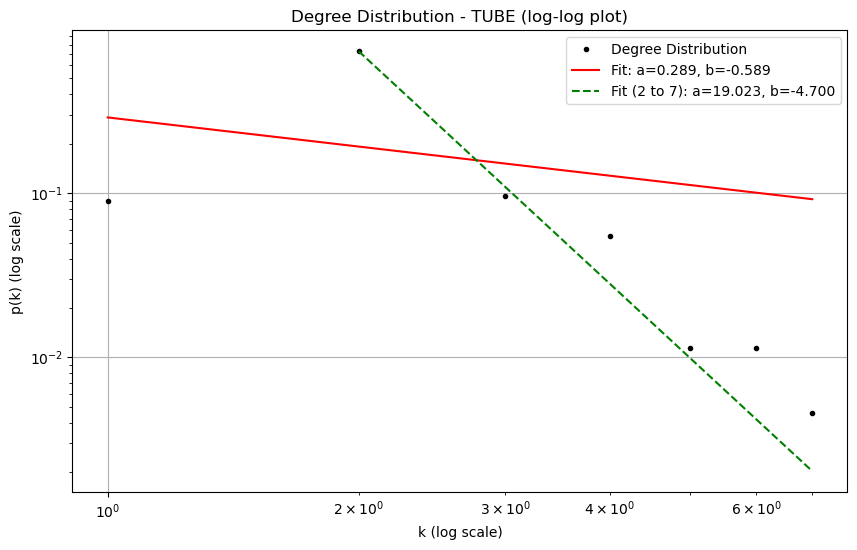

In [224]:
degree_values = np.array(degree_values_G)
probability = np.array(probability_G)

# Filter data for non-zero degree values
non_zero_indices = np.where(degree_values != 0)
degree_values = degree_values[non_zero_indices]
probability = probability[non_zero_indices]

# Define the power-law function
def power_law(x, a, b):
    return a * x**b

# Initial guess for parameters
initial_guess = [1, -2]

# Perform curve fitting
fit_params, cov_matrix = curve_fit(power_law, degree_values, probability, p0=initial_guess)
a, b = fit_params

# Plot the degree distribution and its power-law fit
plt.figure(figsize=(10, 6))
plt.loglog(degree_values, probability, 'ko', markersize=3, label='Degree Distribution')
plt.loglog(degree_values, power_law(degree_values, a, b), 'r-', label='Fit: a=%5.3f, b=%5.3f' % (a, b))

# Filter data for the specified range K=2 to 7
mask = (degree_values >= 2) & (degree_values <= 7)
degree_values_subset = degree_values[mask]

# Fit power law to the subset of data
fit_params_subset, _ = curve_fit(power_law, degree_values_subset, probability[mask], p0=initial_guess)
a_subset, b_subset = fit_params_subset

# Plot the fitted line for the subset
plt.loglog(degree_values_subset, power_law(degree_values_subset, a_subset, b_subset), 'g--', label='Fit (2 to 7): a=%5.3f, b=%5.3f' % (a_subset, b_subset))

# Labeling and styling
plt.xlabel('k (log scale)')
plt.ylabel('p(k) (log scale)')
plt.title('Degree Distribution - TUBE (log-log plot)')
plt.legend()
plt.grid(True)
plt.show()


## 7. clustering coefficient

describes the degree of clustering or local cohesion among nodes in a network. It measures the probability of connections among a node's neighbors.

Specifically, for a node i, its clustering coefficient is defined as the ratio of the actual number of connections between its neighbors to the total possible number of connections among its neighbors. In other words, the clustering coefficient quantifies the probability of closed triangles formed among a node's neighbors.

The clustering coefficient ranges from 0 to 1. A clustering coefficient close to 1 indicates that the neighbors of a node are highly interconnected, forming tightly-knit clusters. Conversely, a clustering coefficient close to 0 indicates a lower proportion of connections among the neighbors, suggesting a more dispersed network structure.

In [225]:
#Average clustering coefficient (C):
clus_ER = nx.average_clustering(ER)
clus_BA = nx.average_clustering(BA)
clus_G = nx.average_clustering(G)

clus=[clus_ER,clus_BA,clus_G]

#Number of nodes (N):
nodes_ER= ER.number_of_nodes()  
nodes_BA= BA.number_of_nodes()  
nodes_G= G.number_of_nodes()  

nodes=[nodes_ER,nodes_BA,nodes_G]

#Number of edges (L):
edges_ER= ER.number_of_edges()  
edges_BA= BA.number_of_edges()  
edges_G= G.number_of_edges()  

edges=[edges_ER,edges_BA,edges_G]

#Average degree <k>:

av_deg_ER= mean(ER_deg) 
av_deg_BA= mean(BA_deg) 
av_deg_G= mean(G_deg)

av_deg=[av_deg_ER,av_deg_BA,av_deg_G]

name=['Erdős-Rényi','Barabási–Albert', 'London Tube']

In [226]:
df_all = pd.DataFrame({'Networks':name,'N':nodes,'L':edges,'<k>':av_deg,'C':clus})
df_all

,Networks,N,L,<k>,C
0,Erdős-Rényi,438,479,2.187215,0.000000
1,Barabási–Albert,438,486,2.219178,0.010573
2,London Tube,438,486,2.219178,0.022603


In [227]:
# when we work with random graphs we need to run many different samples and use the average properties.
BA_1000 = [nx.barabasi_albert_graph(num_nodes_tube, 1,initial_graph=Initial_tube)  for _ in range(1000)] 
BA_C = [nx.average_clustering(i) for i in BA_1000]
BA_CC=sum(BA_C)/len(BA_C) 
BA_CC


0.011773274229885335

In [228]:
ER_1000 = [nx.erdos_renyi_graph(num_nodes_tube,p)  for _ in range(1000)]
ER_C = [nx.average_clustering(i) for i in ER_1000]
ER_CC=sum(ER_C)/len(ER_C) 

ER_CC

0.003324967054761572

In [229]:
df_mean = pd.DataFrame({'Networks':name,'N':nodes,'L':edges,'<k>':av_deg,'C_avg':[ER_CC,BA_CC,clus_G]})
df_mean

,Networks,N,L,<k>,C_avg
0,Erdős-Rényi,438,479,2.187215,0.003325
1,Barabási–Albert,438,486,2.219178,0.011773
2,London Tube,438,486,2.219178,0.022603


![comparison](output.png)
